In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('../data/Traffic_Collision_Data_from_2010_to_Present.csv', delimiter=',')

In [4]:
# Location, Date reported, date occurred, area name, premise desc

# Victim age, sex, descent for biased analysis
df['Location'][:] == '(0.0, 0.0)'

0         False
1         False
2         False
3         False
4         False
          ...  
519650    False
519651    False
519652    False
519653    False
519654    False
Name: Location, Length: 519655, dtype: bool

In [5]:
# Biased analysis
biased_analysis = {
    'area_name':df['Area Name'],
    'crime_code':df['Crime Code'],
    'victim_age':df['Victim Age'],
    'victim_sex':df['Victim Sex'],
    'victim_race':df['Victim Descent']
}
df_biased = pd.DataFrame(biased_analysis)

In [6]:
# Parse coordinates into distinct variables
str_coord = []
for i in range(len(df['Location'])):
    temp_str = df['Location'][i].replace('(', '').replace(')', '').replace(',', '').split(' ')
    temp_coord = [float(x) for x in temp_str]
    str_coord.append([x for x in reversed(temp_coord)])
 
lon = [x[0] for x in str_coord]
lat = [x[1] for x in str_coord]


f = {
    'date_occur':df['Date Occurred'],
    'time_occur':df['Time Occurred'],
    'num_of_accidents':df['Area ID'],
    'location':str_coord,
    'longitude':lon,
    'latitude':lat,
    'str_location':df['Location']
    }
data = pd.DataFrame(f)

In [7]:
# Drop all 0, 0 coordinates
# data.groupby('longitude').count()['num_of_accidents']

track_zero_index = []
for i in range(len(data)):
    if (data['latitude'][i], data['longitude'][i]) == (0.0, 0.0):
        track_zero_index.append(i)
        
# Remove indices
data = data.drop(track_zero_index)

In [8]:
data

,date_occur,time_occur,num_of_accidents,location,longitude,latitude,str_location
0,05/18/2019,110,2,"[-118.2731, 34.0508]",-118.2731,34.0508,"(34.0508, -118.2731)"
1,10/11/2011,1735,5,"[-118.2905, 33.8542]",-118.2905,33.8542,"(33.8542, -118.2905)"
2,08/09/2018,1830,6,"[-118.3252, 34.1052]",-118.3252,34.1052,"(34.1052, -118.3252)"
3,05/09/2012,845,3,"[-118.3548, 34.0255]",-118.3548,34.0255,"(34.0255, -118.3548)"
4,06/13/2012,745,12,"[-118.2827, 33.9997]",-118.2827,33.9997,"(33.9997, -118.2827)"
...,...,...,...,...,...,...,...
519650,04/24/2019,925,20,"[-118.2916, 34.0598]",-118.2916,34.0598,"(34.0598, -118.2916)"
519651,05/07/2019,1845,20,"[-118.3128, 34.069]",-118.3128,34.0690,"(34.069, -118.3128)"
519652,05/06/2019,2300,21,"[-118.5951, 34.2282]",-118.5951,34.2282,"(34.2282, -118.5951)"
519653,03/17/2019,1600,21,"[-118.6015, 34.1878]",-118.6015,34.1878,"(34.1878, -118.6015)"


In [9]:
import seaborn as sns
sns.distplot(data['latitude'], kde=False, hist=True, hist_kws={"range": [33.25,34.75]})

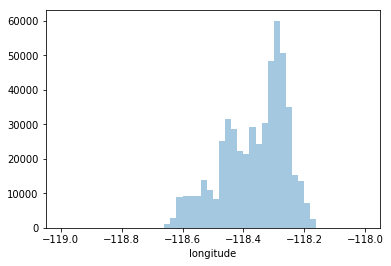

In [10]:
sns.distplot(data['longitude'], kde=False, hist=True, hist_kws={"range": [-119,-118]})

In [11]:
import plotly.express as px
fig = px.density_mapbox(data, lat='latitude', lon='longitude', radius=10,
                        center=dict(lat=0, lon=180), zoom=0,
                        mapbox_style="stamen-terrain")
# fig.show()

In [12]:
x = data.groupby('str_location').count()['num_of_accidents']

In [13]:
keys = x.keys().tolist()
values = [i for i in x]

In [14]:
final_f = {'location': keys, 'number_of_accidents': values}
final_df = pd.DataFrame(final_f)

In [15]:
final_df

,location,number_of_accidents
0,"(33.3427, -118.3258)",2
1,"(33.7065, -118.2879)",1
2,"(33.7065, -118.2928)",20
3,"(33.7067, -118.2879)",4
4,"(33.707, -118.2901)",1
...,...,...
41824,"(34.3797, -118.5286)",1
41825,"(34.5957, -118.1784)",5
41826,"(34.6012, -118.1605)",1
41827,"(34.6903, -118.3053)",1
